# Batch Image Process - Read, CropCenter, Resize, and Save
read images from a directory,\
crop them from the center,\
resize them into 1024*1024,\
then save them into a new directory.

In [92]:
from skimage import io,transform
import numpy as np
import os
import cv2
from matplotlib import gridspec
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline

In [93]:
from keras.preprocessing.image import save_img

In [99]:
def delete_dot_ds_store(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            if filename == '.DS_Store':
                os.remove(os.path.join(root, filename))

In [100]:
# set the images path
DATADIR =  "/Users/zhaonan/UAL-CCI/07-MScAdvancedProject/1-imageProcess/original-images-11" # 设置图片路径，该路径
DST_IMG_SIZE=1024 # 设置目标像素大小
path=os.path.join(DATADIR) # 使用os.path模块的join方法生成路径
delete_dot_ds_store(path) # delete the .DS_Store file
img_list=os.listdir(path)

In [101]:
img_list

['046.敦煌莫高窟克孜尔壁画.jpg',
 '053.敦煌莫高窟克孜尔壁画.jpg',
 '150.敦煌莫高窟克孜尔壁画.jpg',
 '145.敦煌莫高窟克孜尔壁画.jpg',
 '022.敦煌莫高窟克孜尔壁画.jpg',
 '037.敦煌莫高窟克孜尔壁画.jpg',
 '134.敦煌莫高窟克孜尔壁画.jpg',
 '121.敦煌莫高窟克孜尔壁画.jpg',
 '129.敦煌莫高窟克孜尔壁画.jpg',
 '158.敦煌莫高窟克孜尔壁画.jpg',
 '142.敦煌莫高窟克孜尔壁画.jpg',
 '157.敦煌莫高窟克孜尔壁画.jpg',
 '054.敦煌莫高窟克孜尔壁画.jpg',
 '041.敦煌莫高窟克孜尔壁画.jpg',
 '126.敦煌莫高窟克孜尔壁画.jpg',
 '133.敦煌莫高窟克孜尔壁画.jpg',
 '030.敦煌莫高窟克孜尔壁画.jpg',
 '025.敦煌莫高窟克孜尔壁画.jpg',
 '038.敦煌莫高窟克孜尔壁画.jpg',
 '049.敦煌莫高窟克孜尔壁画.jpg',
 '039.敦煌莫高窟克孜尔壁画.jpg',
 '048.敦煌莫高窟克孜尔壁画.jpg',
 '040.敦煌莫高窟克孜尔壁画.jpg',
 '055.敦煌莫高窟克孜尔壁画.jpg',
 '156.敦煌莫高窟克孜尔壁画.jpg',
 '143.敦煌莫高窟克孜尔壁画.jpg',
 '024.敦煌莫高窟克孜尔壁画.jpg',
 '031.敦煌莫高窟克孜尔壁画.jpg',
 '132.敦煌莫高窟克孜尔壁画.jpg',
 '127.敦煌莫高窟克孜尔壁画.jpg',
 '128.敦煌莫高窟克孜尔壁画.jpg',
 '144.敦煌莫高窟克孜尔壁画.jpg',
 '151.敦煌莫高窟克孜尔壁画.jpg',
 '052.敦煌莫高窟克孜尔壁画.jpg',
 '047.敦煌莫高窟克孜尔壁画.jpg',
 '120.敦煌莫高窟克孜尔壁画.jpg',
 '135.敦煌莫高窟克孜尔壁画.jpg',
 '036.敦煌莫高窟克孜尔壁画.jpg',
 '023.敦煌莫高窟克孜尔壁画.jpg',
 '058.敦煌莫高窟克孜尔壁画.jpg',
 '029.敦煌莫高窟克孜尔壁画.jpg',
 '034.敦煌莫高窟克孜尔壁画.jpg',
 '021.敦煌莫高窟克孜尔壁画.jpg',
 '122.敦煌莫高窟

In [96]:
def crop_center(image):
  #"""Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[0], shape[1])
  offset_y = max(shape[0] - shape[1], 0) // 2
  offset_x = max(shape[1] - shape[0], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

In [102]:
# read images, crop from center, and resize them to 1024*1024
ind = 0
for i in img_list:
    img = cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR) # 调用cv2.imread读入图片，读入格式为IMREAD_COLOR
    cropped_img = crop_center(img)
    resized_img = tf.image.resize(cropped_img, (DST_IMG_SIZE,DST_IMG_SIZE))
    resized_img = resized_img[:,:,::-1]  # transform image to rgb
    img_name='11-'+str(ind)+'.jpg'
    save_path='/Users/zhaonan/UAL-CCI/07-MScAdvancedProject/1-imageProcess/processed-images-11/'+img_name
    ind = ind+1
    save_img(save_path,resized_img)

Below are the test code for showing the images in different stages (crop, resize, color-correct)

In [51]:
# for test and show the images
DATADIR =  "/Users/zhaonan/UAL-CCI/07-MScAdvancedProject/1-imageProcess/test-images"
DST_IMG_SIZE=1024 # 设置目标像素大小
path=os.path.join(DATADIR) # 使用os.path模块的join方法生成路径
img_list=os.listdir(path)

ind = 0
original_imgs = []
cropped_imgs = []
resized_imgs = []
corrected_imgs = []

for i in img_list:
    img = cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR) # 调用cv2.imread读入图片，读入格式为IMREAD_COLOR
    original_imgs.append(img)
    cropped_img = crop_center(img)
    cropped_imgs.append(cropped_img)
    resized_img = tf.image.resize(cropped_img, (DST_IMG_SIZE,DST_IMG_SIZE))
    resized_imgs.append(resized_img)
    corrected_img = resized_img[:,:,::-1]  # transform image to rgb
    corrected_imgs.append(corrected_img)
    img_name=str(ind)+'.jpg'
    save_path='/Users/zhaonan/UAL-CCI/07-MScAdvancedProject/1-imageProcess/test-processed-images/'+img_name
    ind = ind+1
    save_img(save_path,corrected_img)
    


Text(0.5, 1.0, 'color corrected image')

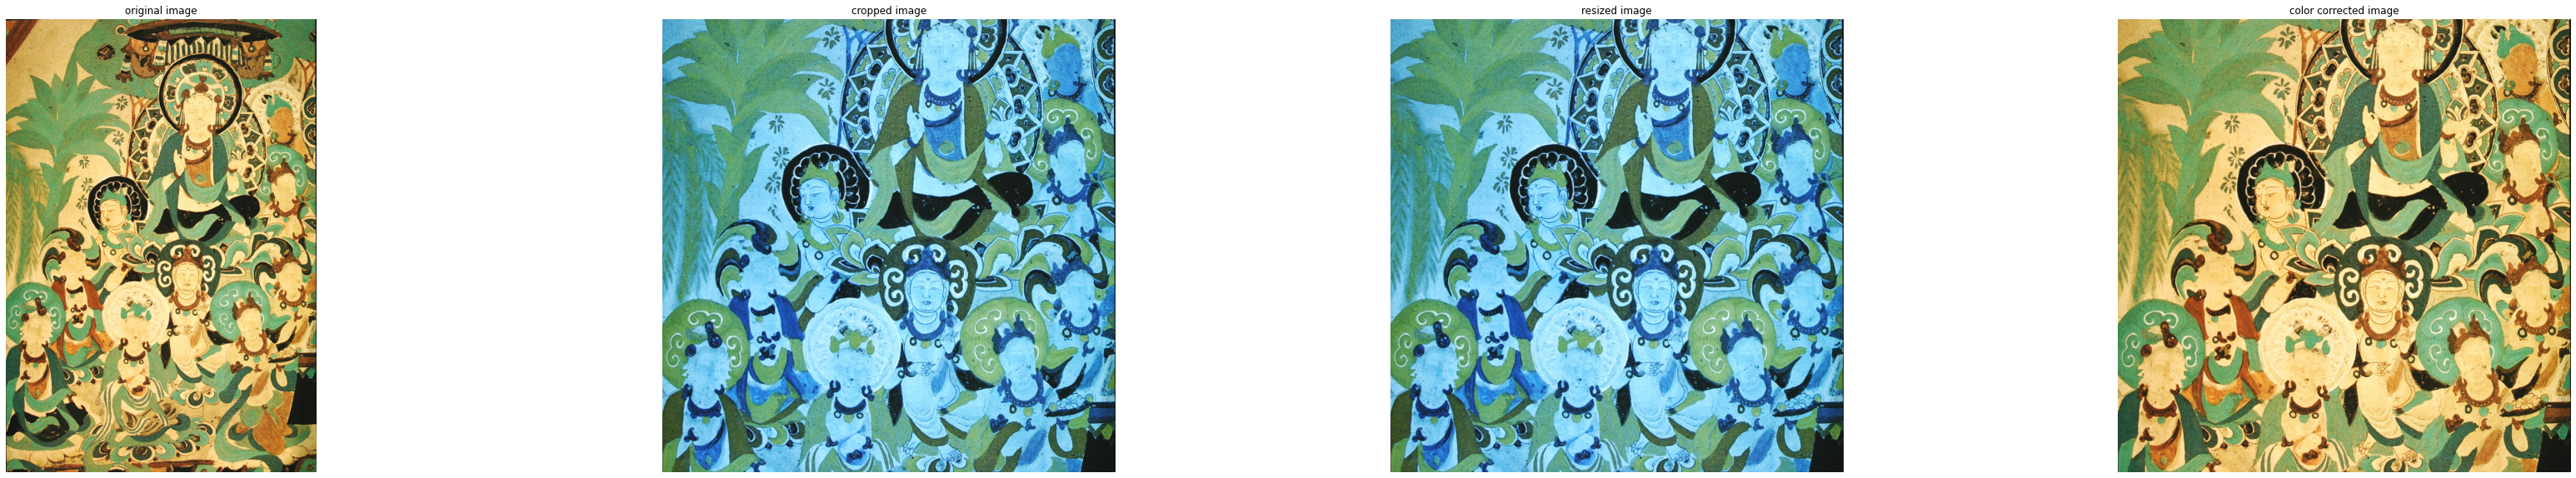

In [52]:
# show the original images, cropped(center) images, resized images, and color corrected images.
original_imgs[0] = original_imgs[0][:,:,::-1]
resized_imgs[0] = np.asarray(resized_imgs[0].numpy(),dtype = "uint8")
corrected_imgs[0] = np.asarray(corrected_imgs[0].numpy(),dtype = "uint8")
show_images = [original_imgs[0],cropped_imgs[0],resized_imgs[0],corrected_imgs[0]]
titles = ["original image","cropped image","resized image","color corrected image"]
rows = 1
columns = 4
fig = plt.figure(figsize=(60, 10))
fig.add_subplot(rows, columns, 1)
plt.imshow(show_images[0])
plt.axis('off')
plt.title(titles[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(show_images[1])
plt.axis('off')
plt.title(titles[1])
fig.add_subplot(rows, columns, 3)
plt.imshow(show_images[2])
plt.axis('off')
plt.title(titles[2])
fig.add_subplot(rows, columns, 4)
plt.imshow(show_images[3])
plt.axis('off')
plt.title(titles[3])

--------
## below are just tests. 

In [15]:
# wrong resize, directly resize the img
# notice that this way uses "cv2" instead of tf.image

ind=0
for i in img_list:
  img_array=cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR)#调用cv2.imread读入图片，读入格式为IMREAD_COLOR
  new_array=cv2.resize(img_array,(DST_IMG_SIZE,DST_IMG_SIZE))
  img_name='wrong_resize_'+str(ind)+'.jpg'
  save_path='/Users/zhaonan/UAL-CCI/07-MScAdvancedProject/1-imageProcess/processed-images/'+img_name
  ind=ind+1
  cv2.imwrite(save_path,new_array)#调用cv.2的imwrite函数保存图片

<class 'int'>


(738, 1916, 3)


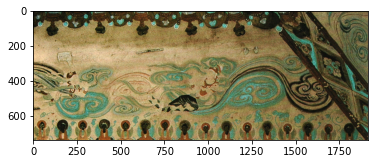

In [8]:
# read images, correct the color and show.

img = cv2.imread('test-images/test.jpg')
print(img.shape) # Print image shape
# cv2.imshow("original", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
%matplotlib inline

im2 = img[:,:,::-1] 	# transform image to rgb
plt.imshow(im2)
plt.show()

738 1916
size 738
1 2


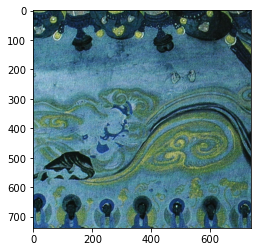

In [17]:
# crop way 1: crop with numpy array

size = 512
h, w = img.shape[0:2]
print(h,w)
size = h if h<=w else w
print("size",size)
    
h_no = h // size # "//"means floor division
w_no = w // size
print(h_no,w_no) # 1 3
for row in range(0, h_no):
    for col in range(0, w_no):
        cropped_img = img[size*row : size*(row+1), size*col : size*(col+1), : ]
        plt.imshow(cropped_img) # 记得颜色不对要转换
        # cv.imwrite(output_path + "img_" + str(counter) + f"crop_{row}_{col}" + ".png", cropped_img)

shape (738, 1916, 3)
new_shape 738
0 589


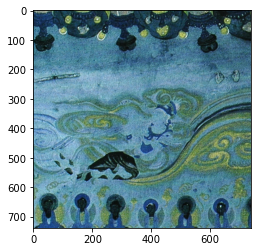

In [23]:
# crop way 2: crop center with tf.image

shape = img.shape
print("shape",shape)
new_shape = min(shape[0], shape[1])
print("new_shape",new_shape)
offset_y = max(shape[0] - shape[1], 0) // 2
offset_x = max(shape[1] - shape[0], 0) // 2
print(offset_y,offset_x)
tf_cropped = tf.image.crop_to_bounding_box(img, offset_y, offset_x, new_shape, new_shape)

plt.imshow(tf_cropped)# 记得颜色不对要转换

-----
below from another [csdn blog](https://blog.csdn.net/heshuaimin/article/details/105366936?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_title~default-0.no_search_link&spm=1001.2101.3001.4242.0)

In [ ]:
import cv2 as cv
import os


def crop_image(image_dir, output_path, size):   # image_dir 批量处理图像文件夹 size 裁剪后的尺寸
    # 获取图片路径列表
    file_path_list = []
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        file_path_list.append(file_path)

    # 逐张读取图片剪裁
    for counter, image_path in enumerate(file_path_list):
        image = cv.imread(image_path)
        h, w = image.shape[0:2]
        h_no = h // size
        w_no = w // size

        for row in range(0, h_no):
            for col in range(0, w_no):
                cropped_img = image[size*row : size*(row+1), size*col : size*(col+1), : ]
                cv.imwrite(output_path + "img_" + str(counter) + f"crop_{row}_{col}" + ".png",
                           cropped_img)


if __name__ == "__main__":
    image_dir = "D:\\Pycharm_MachineLearning\\cnn_experiment_tool\\crack\\"
    output_path = "D:\\Pycharm_MachineLearning\\cnn_experiment_tool\\resized_crack\\"
    size = 227
    crop_image(image_dir, output_path, size)
